# Map label cell (level2) to cell in cancer or stroma

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import sys, os
#from cellpose import io
from skimage import io
from skimage.measure import label, regionprops

other_dir_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(other_dir_path)

import IMCprocess.spatial_analysis.mask_utils as mu
import IMCprocess.utils.utils as ut

## import cell data from mask

In [2]:
cell_in_reg = ut.read_pickle_obj('output_obj/01cell_data.pkl')

In [3]:
cell_in_reg

,cells_in_stroma,cells_in_cancer,cells_in_cancer&tissue,num_cells_in_stroma,num_cells_in_cancer,num_cells_in_cancer&tissue
0,"[1, 3, 4, 5, 9, 10, 12, 15, 18, 19, 23, 26, 27...","{1: [2, 8, 14, 21, 22, 25, 29, 30, 31, 32, 38,...","[2, 6, 7, 8, 11, 13, 14, 16, 17, 20, 21, 22, 2...",2114,29,2463


## import label object (Immune level2)

In [4]:
data_path = '/Users/pattama/Desktop/UiB/cancer/example_share_code/share_with_vladan/mask_analysis/example_data/'
data_level2 = ut.read_pickle_obj(data_path+'02hanna_adata_totalNB_obj_ImmuneLevel2.pkl')

In [5]:
# Check adata dict to get a keyword for creating level2 object
# In this object, there are 2 keys: 'level1' and 'Immune_level2'
# we want to use 'Immune_level2' for calculating the number of cells in each region
data_level2.adata_dict

{'level1': AnnData object with n_obs × n_vars = 132951 × 51
     obs: 'img_id', 'PhenoGraph_clusters', 'level1_annotated'
     uns: 'pca', 'PhenoGraph_Q', 'PhenoGraph_k', 'neighbors', 'umap', 'PCs', 'dendrogram_PhenoGraph_clusters', 'PhenoGraph_clusters_colors', 'level1_annotated_colors'
     obsm: 'spatial', 'X_pca', 'X_umap'
     obsp: 'distances', 'connectivities',
 'Immune_level2': AnnData object with n_obs × n_vars = 29445 × 51
     obs: 'img_id', 'PhenoGraph_clusters', 'level1_annotated', 'Immune_level2_annotated'
     uns: 'pca', 'PhenoGraph_Q', 'PhenoGraph_k', 'neighbors', 'umap', 'PCs', 'dendrogram_PhenoGraph_clusters', 'PhenoGraph_clusters_colors', 'level1_annotated_colors', 'Immune_level2_annotated_colors'
     obsm: 'spatial', 'X_pca', 'X_umap'
     obsp: 'distances', 'connectivities'}

In [6]:
# Create level2 object and check for obs data
obj_level2 = data_level2.adata_dict['Immune_level2']

In [7]:
# There are mulitple image in the object so we need to select only one for analysis
obj_level2.obs

,img_id,PhenoGraph_clusters,level1_annotated,Immune_level2_annotated
Cell_id,,,,
2_0,R1_001,8,Immune,CD8
19_0,R1_001,10,Immune,Undef
129_0,R1_001,27,Immune,CD8
155_0,R1_001,13,Immune,CD8
162_0,R1_001,16,Immune,CD8_CD4_FoxP3
...,...,...,...,...
130683_29,R10_003,14,Immune,CD8_CD4_FoxP3
130686_29,R10_003,1,Immune,Undef
130693_29,R10_003,20,Immune,CD4


In [8]:
# Create level2 object only for img_id = R2_002
obj_R2_002_lev2 = obj_level2[obj_level2.obs['img_id'] == 'R2_002']

In [16]:
# Check how many Immune cell in each cell types level2 in this image
obj_R2_002_lev2.obs.Immune_level2_annotated.value_counts()

CD8              523
CD4              485
Undef            376
CD8_CD4_FoxP3    260
CD4_FoxP3        220
CD8_ki67          64
CD4_ki67          49
Name: Immune_level2_annotated, dtype: int64

## Map level2 immune cells in stroma, cancer

In [1]:
## plot the number of cells in each region

In [9]:
fraction_stroma = mu.get_celltype_fraction(obj_R2_002_lev2.obs, 'Immune_level2_annotated', cell_in_reg, 'cells_in_stroma')
fraction_stroma

,fraction_cells_in_stroma
CD8,0.281592
CD4,0.235821
Undef,0.204975
CD8_CD4_FoxP3,0.111443
CD4_FoxP3,0.092537
CD8_ki67,0.045771
CD4_ki67,0.027861


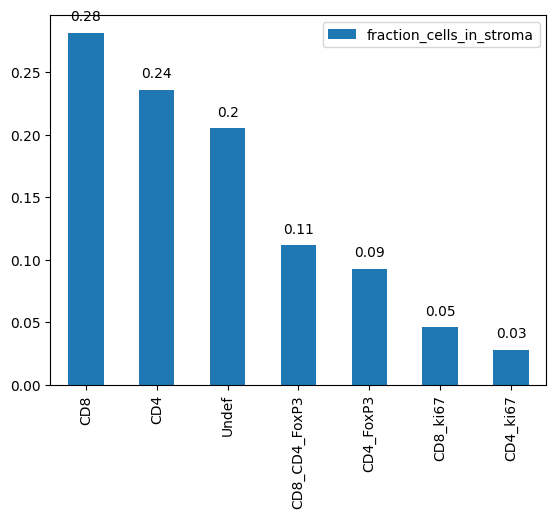

In [10]:
mu.plt_fraction_df(fraction_stroma, 'output/02fraction_Immunecells_in_stroma_level2.png')

In [17]:
fraction_cancer = mu.get_celltype_fraction(obj_R2_002_lev2.obs, 'Immune_level2_annotated', cell_in_reg, 'cells_in_cancer')
fraction_cancer

,fraction_cells_in_cancer
CD4,0.255144
CD8,0.246914
Undef,0.174897
CD8_CD4_FoxP3,0.152263
CD4_FoxP3,0.130658
CD4_ki67,0.021605
CD8_ki67,0.018519


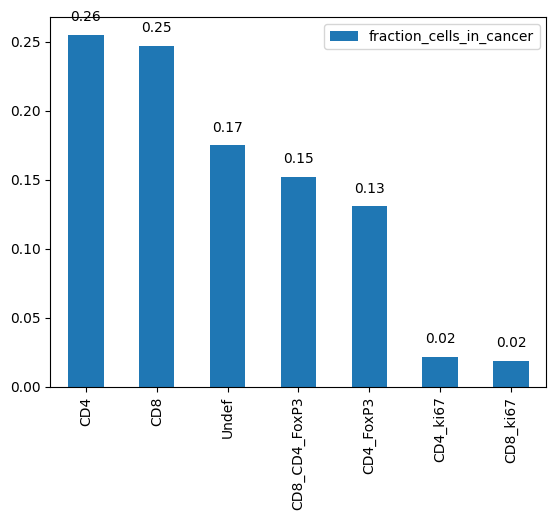

In [18]:
mu.plt_fraction_df(fraction_cancer, 'output/02fraction_Immunecells_in_cancer_level2.png')